# STOCK PRICE ANALYSIS

### EDA ON STOCK PRICE OF 4 COMPANIES I.E. APPLE, AMAZON, GOOGLE AND MICROSOFT OVER A PERIOD OF 5 YEARS FROM 2013 TO 2018.

##  1. Data Collection !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
### Using glob module to access data

In [4]:
# Showing only 5 files out of all data files
glob.glob(r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr/*csv')[0:5]

['C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\ABC_data.csv']

In [5]:
len(glob.glob(r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr/*csv')) ## total files we have 

509

In [6]:
# Considering stock of four companies i.e. Apple, Amazon,Google and Microsoft, for Analysis

In [7]:
company_list = [
    r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr\\AAPL_data.csv' , 
    r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr\\AMZN_data.csv' , 
    r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr\\GOOG_data.csv' , 
    r'C:\Users\VISHAL\Desktop\New folder (6)\individual_stocks_5yr\\MSFT_data.csv'
    
]

In [8]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
### Using Pandas Append() to collect data from various files

In [10]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = current_df.append(all_data , ignore_index=True)
    ##full_df = pd.concat([full_df , current_df] , ignore_index=True) --> Also be done using concat()

In [11]:
all_data.shape ## Dimensions of all_data dataframe ..

(4752, 7)

In [12]:
all_data.head(6)

date   open   high     low  close    volume  Name
0  2013-02-08  27.35  27.71  27.310  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.500  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.750  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.880  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.870  28.04  32663174  MSFT
5  2013-02-15  28.04  28.16  27.875  28.01  49650538  MSFT

In [13]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

## 2. Analysing change in price of the stock overtime !

In [14]:
all_data.isnull().sum() ## checking missing values 

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [15]:
all_data.dtypes ## checking data-types 

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [16]:
## converting data-type of "date" feature into date-time ..

In [17]:
all_data['date'] = pd.to_datetime(all_data['date']) 

In [18]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [19]:
tech_list = all_data['Name'].unique()

In [20]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

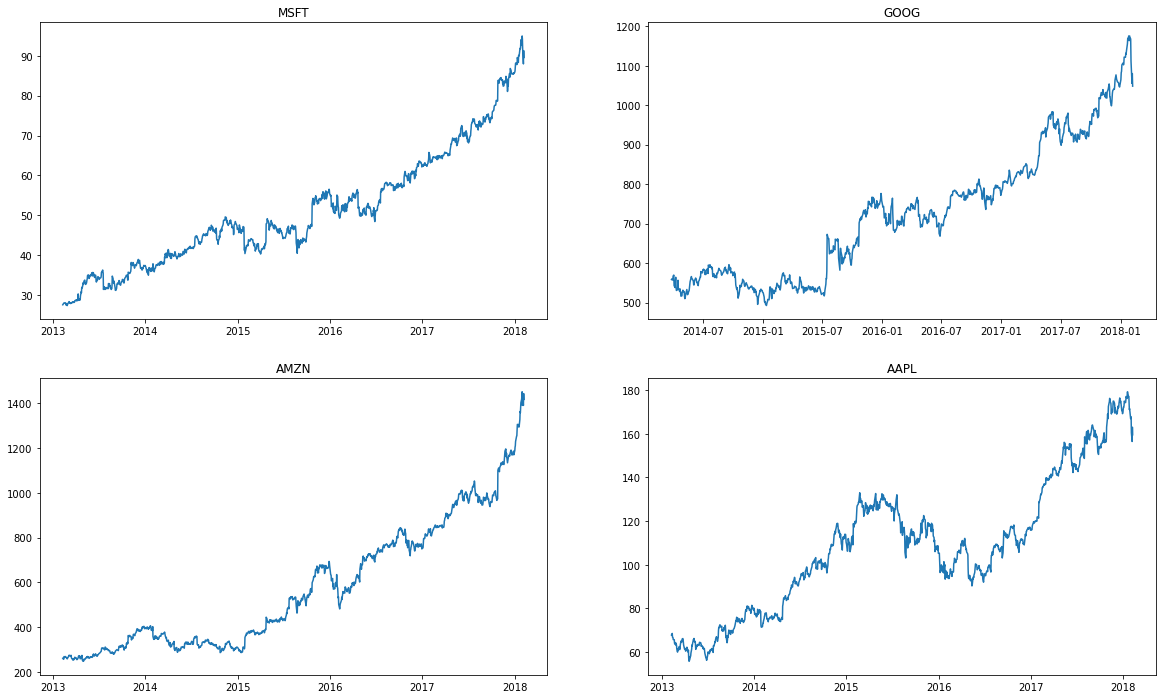

In [21]:
#Plotting stock price of each company over time 
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## Creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## Plotting "date" vs "close"
    plt.title(company)

In [22]:
# Installing Plotly Library
!pip install plotly

In [23]:
# Plotting of date vs. volume of stocks for each company using plotly library
import plotly.express as px
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

The stock price of each company increases over time from year 2013 to 2018. The % change in stock price of google is high as compared to stock price of other 3 companies over a span of 5 years.

## 3. Moving average of the various stocks !

In [24]:
# Taking the stock price of Apple, Amazon, Microsoft and Google
company_list

['C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\MSFT_data.csv']

In [25]:
Apple = pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AAPL_data.csv')
Amazon= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AMZN_data.csv')
Microsoft= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\MSFT_data.csv')
Google= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\GOOG_data.csv')

In [26]:
# Creating a list of all companies to genrate a new column of pct change for each them
Company_N = [Apple, Amazon, Microsoft, Google]

In [27]:
# Calculating Moving_Average for each company on the basis of 10 days, 20 days and 50 days
Moving_Average = [10,20,50]
for Company in Company_N:
    for Mov_Avg in Moving_Average:
        Company['close_'+str(Mov_Avg)] = Company['close'].rolling(Mov_Avg).mean()

In [28]:
# Concatenating moving average of each company in one dateframe
Company_Nam= pd.concat(Company_N)

In [29]:
Company_Nam.shape

(4752, 10)

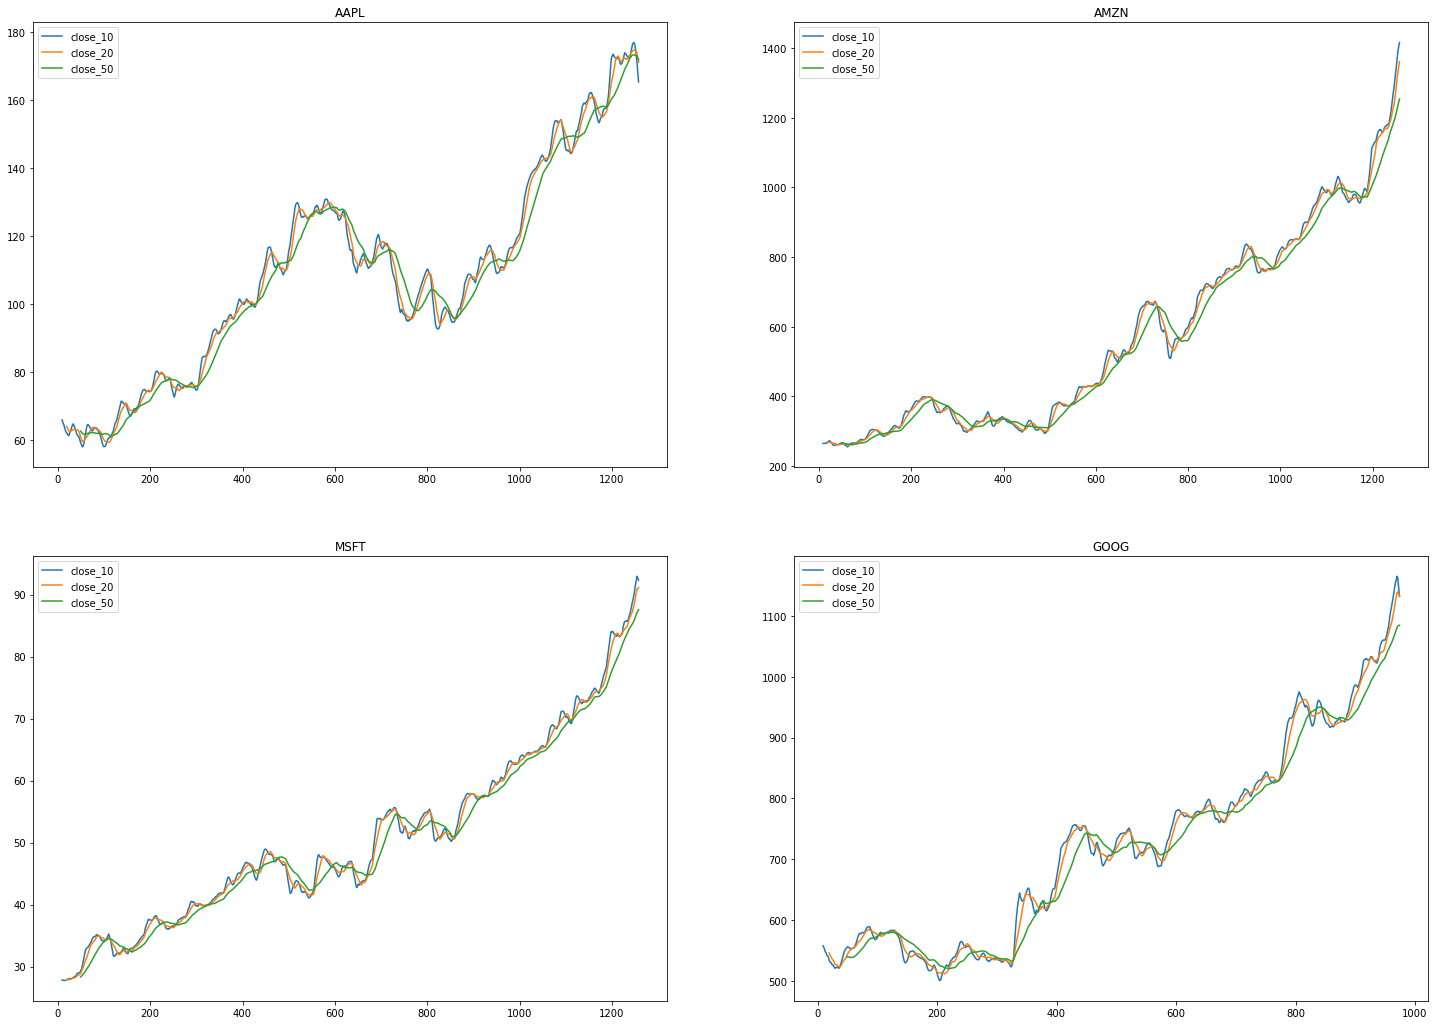

In [30]:
# Plotting Moving_Average of each company
plt.figure(figsize=(25,18))

for index , company in enumerate(Company_Nam['Name'].unique() , 1):
    plt.subplot(2 , 2 , index)
    filter2 = Company_Nam['Name']==company
    df2 = Company_Nam[filter2]
    df2[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

Conclusion-
As the noise of the curve in each case decreases and gives smooth-view by taking the window of 50 days.
Longer time periods are helpful in getting broader market trends.

## 4. Analysing Closing price change in various stocks!


In [31]:
# Again Taking the stock price of Apple, Amazon, Microsoft and Google
company_list

['C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\MSFT_data.csv']

In [32]:
apple = pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AAPL_data.csv')
amazon= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\AMZN_data.csv')
microsoft= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\MSFT_data.csv')
google= pd.read_csv(r'C:\\Users\\VISHAL\\Desktop\\New folder (6)\\individual_stocks_5yr\\\\GOOG_data.csv')

In [33]:
# Creating a list of all companies to genrate a new column of pct change for each them
company_name = [ apple, amazon, microsoft, google]

In [34]:
# Generating new column of Daily return in percentage for each company using pct_change function
# pct_change is used to get percentage change between the current and a prior element
for company in company_name:
    company['Daily return(in %)'] = company['close'].pct_change()*100

In [35]:
# plot the date vs Daily return (in %) using plotly library
for company in company_name:
    figure = px.line(company, x="date", y="Daily return(in %)",title=str(company['Name'][0]))
    figure.show()

## 5. Performing Resampling Analysis of closing price ..


    Before doing Resampling, converting date feature into 'row-index' so that resampling can be done on various basis :
    
    a..Yearly('Y')   
    b..Quarterly('Q')
    c..Monthly('M')

In [36]:
# Concatenating the DataFrame of all four companies-Apple, Amazon, Microsoft and Google stock prices
Company_Name=pd.concat(company_name)

In [37]:
# Converting data type of date column
Company_Name['date'] =pd.to_datetime(Company_Name['date'])

In [38]:
Company_Name.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [39]:
Company_Name.head(4)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297

In [40]:
# Converting date column into row-index
Company_Name.set_index('date' , inplace=True)

In [41]:
Company_Name.head(4)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297

In [42]:
Company_Name['close'].resample('M').mean() ## resample data on monthly basis ..

date
2013-02-28    119.026255
2013-03-31    119.006003
2013-04-30    117.636265
2013-05-31    120.152430
2013-06-30    123.175007
                 ...    
2017-10-31    554.749773
2017-11-30    606.606190
2017-12-31    617.286125
2018-01-31    675.965476
2018-02-28    689.823500
Freq: M, Name: close, Length: 61, dtype: float64

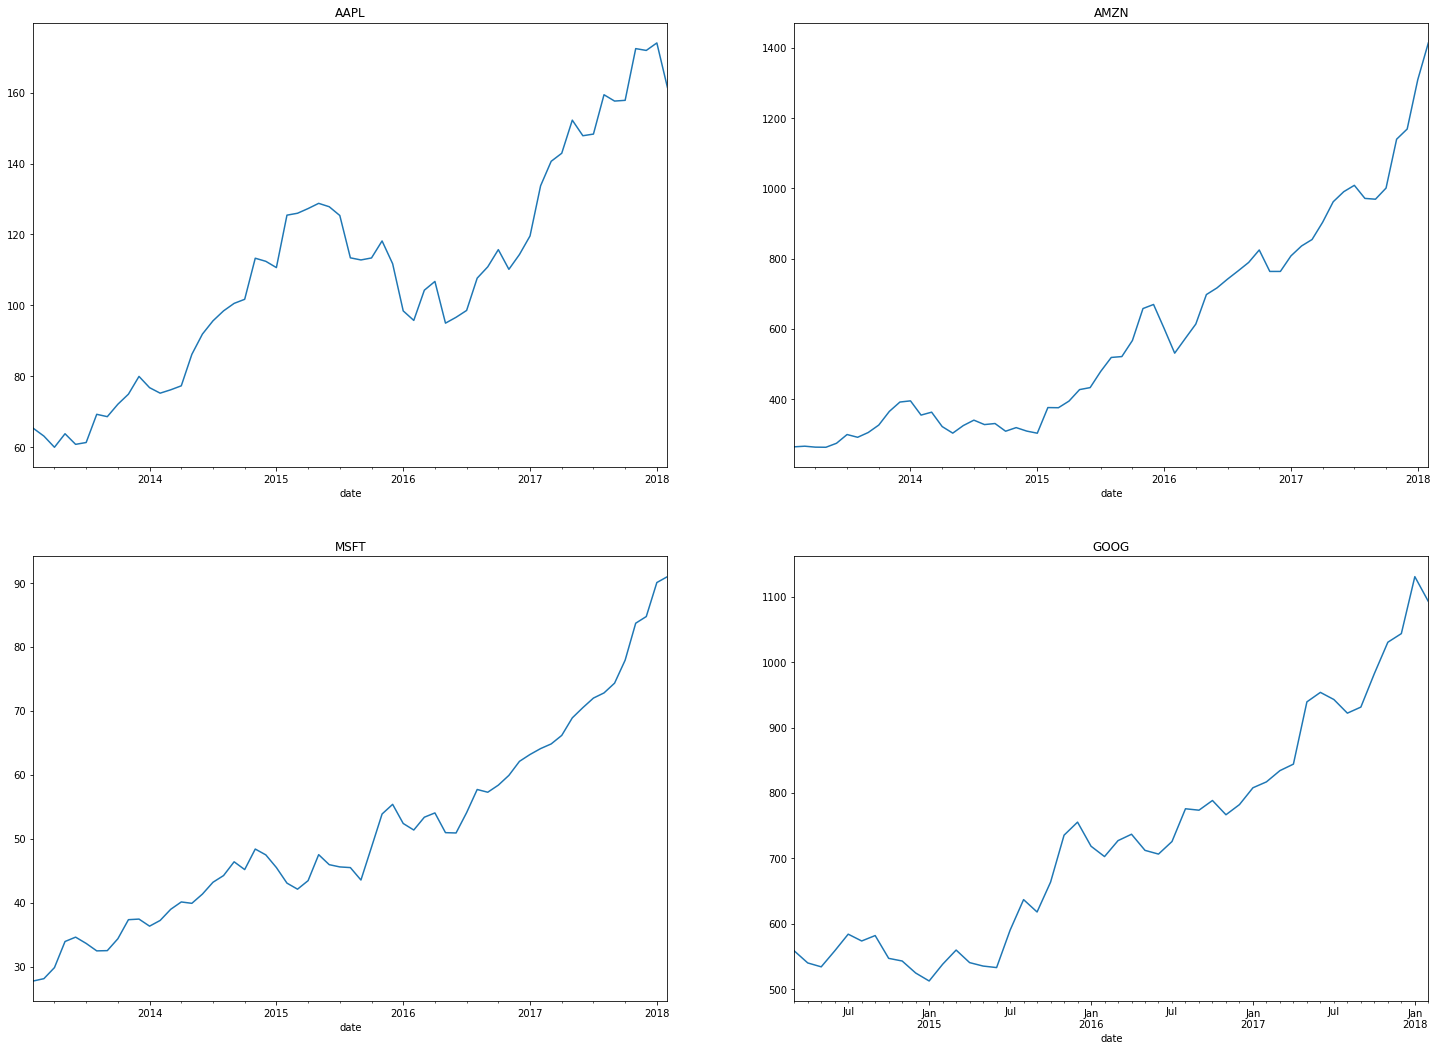

In [43]:
# plotting resampling analysis on monthly basis of each company using pandas plot function
plt.figure(figsize=(25,18))
for index , company in enumerate(Company_Name['Name'].unique() , 1):
    plt.subplot(2 , 2 , index)
    filter3 = Company_Name['Name']==company
    df3 = Company_Name[filter3]
    df3['close'].resample('M').mean().plot(ax=plt.gca())
    plt.title(company)
    

In [44]:
Company_Name['close'].resample('Y').mean() ## resample data on yearly basis ..

date
2013-12-31    133.964340
2014-12-31    237.119599
2015-12-31    311.838304
2016-12-31    400.717892
2017-12-31    528.125473
2018-12-31    678.630481
Freq: A-DEC, Name: close, dtype: float64

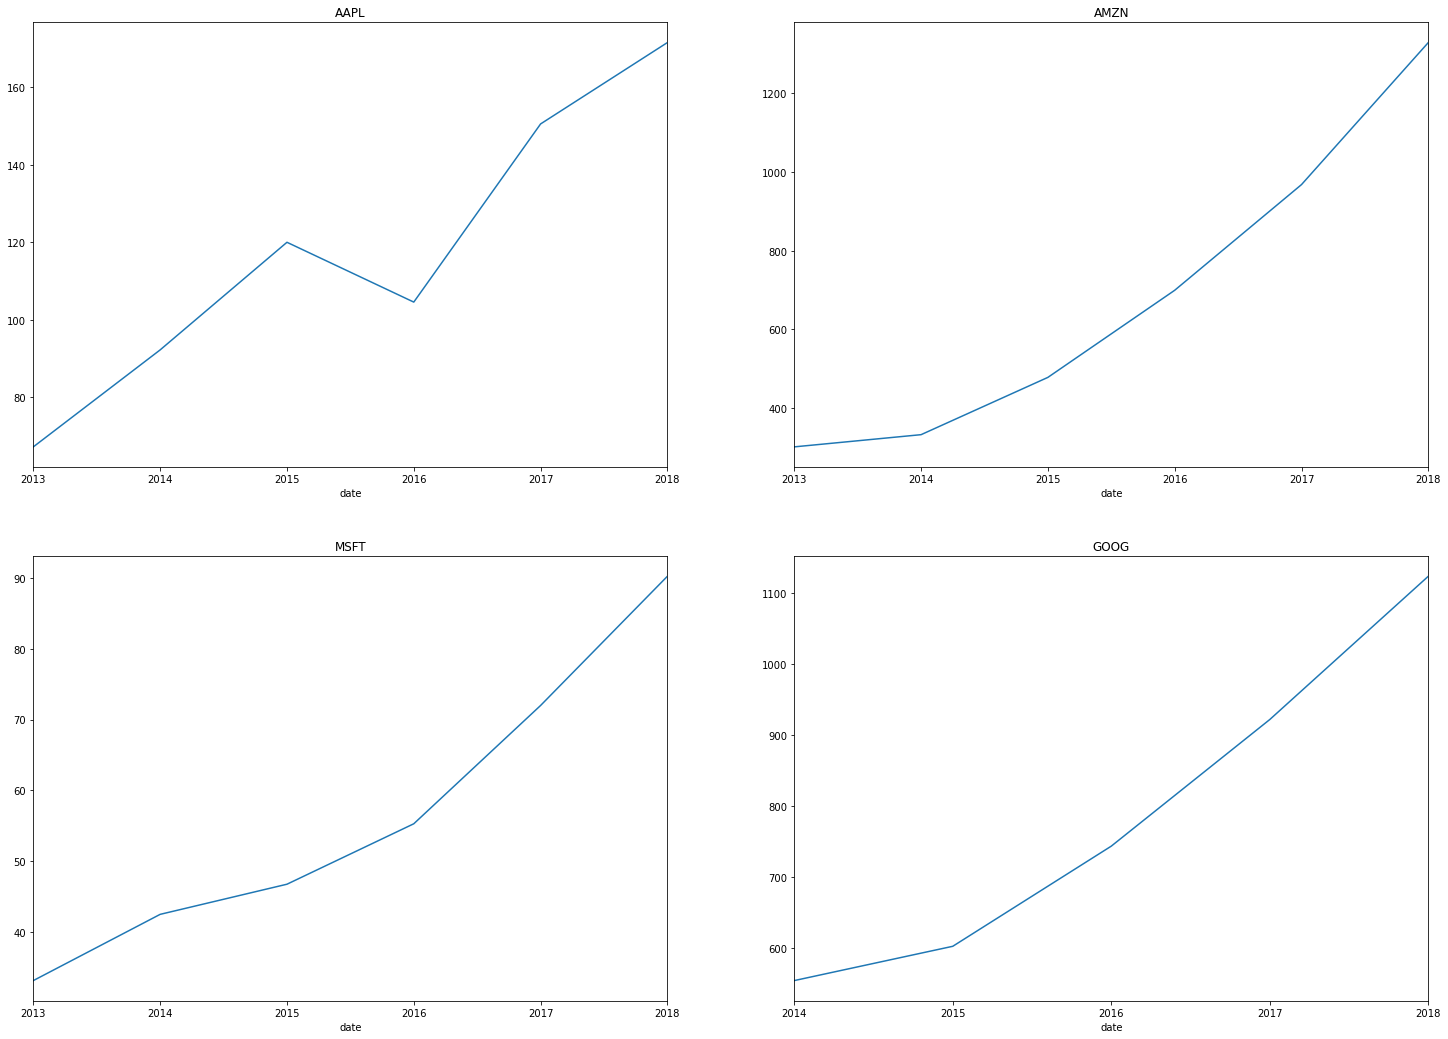

In [45]:
# plotting resampling analysis on yearly basis of each company using pandas plot function
plt.figure(figsize=(25,18))
for index , company in enumerate(Company_Name['Name'].unique() , 1):
    plt.subplot(2 , 2 , index)
    filter4 = Company_Name['Name']==company
    df4 = Company_Name[filter4]
    df4['close'].resample('Y').mean().plot(ax=plt.gca())
    plt.title(company)

In [46]:
Company_Name['close'].resample('Q').mean() ## resample data on Quaterly basis ..

date
2013-03-31    119.014342
2013-06-30    120.232054
2013-09-30    132.434489
2013-12-31    157.168665
2014-03-31    167.989698
2014-06-30    246.537420
2014-09-30    263.826720
2014-12-31    251.369004
2015-03-31    263.352992
2015-06-30    281.937440
2015-09-30    320.597754
2015-12-31    378.725078
2016-03-31    359.024324
2016-06-30    386.533164
2016-09-30    421.797500
2016-12-31    434.083532
2017-03-31    462.420867
2017-06-30    521.576429
2017-09-30    535.573611
2017-12-31    591.888056
2018-03-31    678.630481
Freq: Q-DEC, Name: close, dtype: float64

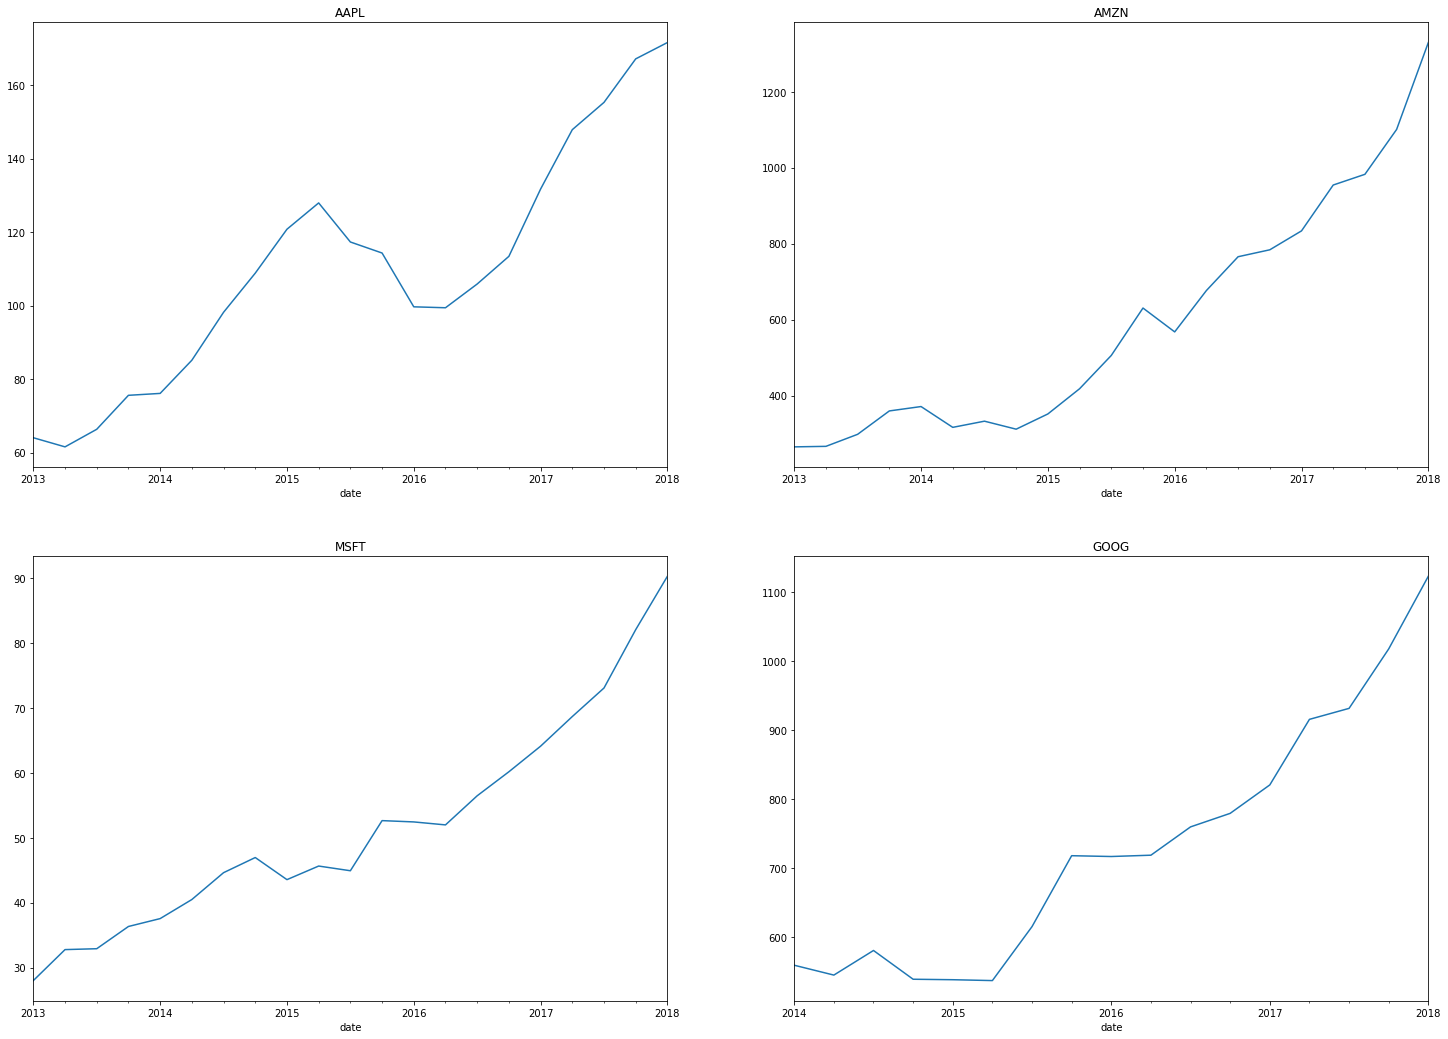

In [47]:
# plotting resampling analysis on Quarterly basis of each company using pandas plot function
plt.figure(figsize=(25,18))
for index , company in enumerate(Company_Name['Name'].unique() , 1):
    plt.subplot(2 , 2 , index)
    filter5 = Company_Name['Name']==company
    df5 = Company_Name[filter5]
    df5['close'].resample('Q').mean().plot(ax=plt.gca())
    plt.title(company)

Resampling done above shows a long-term broader view, and in each case whether it is monthly,quaterly or yearly stock price of all four companies are increasing. 

#### Note- Resampling can also be done on short-term view as well (On minute, hourly, daily and weeekly basis)

## 6. Analyzing the  closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !

In [67]:
#Creating a new dataframe for closing price of each company
closing_price = pd.DataFrame()

In [68]:
# Extracting closing price of each company from original dataset and inserting it into closing_price dataframe column wise
closing_price['apple_close'] = apple['close']
closing_price['amzn_close'] = amazon['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = microsoft['close']

In [69]:
closing_price.head()

apple_close  amzn_close  goog_close  msft_close
0      67.8542      261.95      558.46       27.55
1      68.5614      257.21      559.99       27.86
2      66.8428      258.70      556.97       27.88
3      66.7156      269.47      567.16       28.03
4      66.6556      269.24      567.00       28.04

'''
    Pair-plot is all about , Considering some pairs & 
    trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

'''


#### Dis-advantages: 
#### Can't be used when number of features are high.
#### Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#### Only possible to view 2D patterns.



### NOTE: the diagnol elements are (histogram) for each feature.

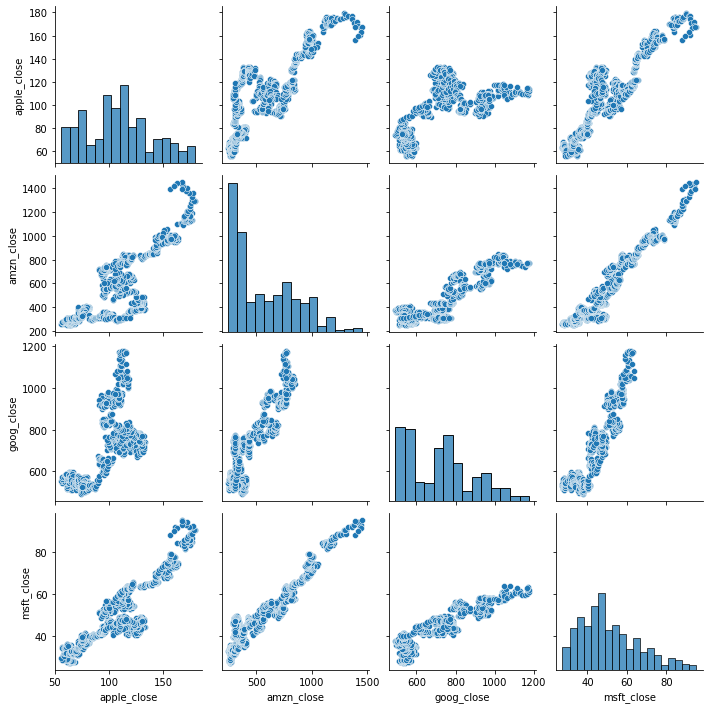

In [51]:
#plotting closing price of each company using seaborn library
sns.pairplot(closing_price)

In [52]:
# Checking the correlation between closing price of company stocks with each other
closing_price.corr()

apple_close  amzn_close  goog_close  msft_close
apple_close     1.000000    0.819078    0.640522    0.899689
amzn_close      0.819078    1.000000    0.888456    0.955977
goog_close      0.640522    0.888456    1.000000    0.907011
msft_close      0.899689    0.955977    0.907011    1.000000

#### co-relation plot for stock prices

<AxesSubplot:>

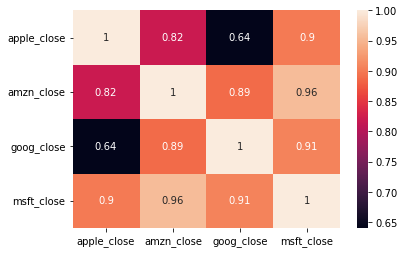

In [53]:
# plotting a heatmap or create a visualization for correlation between closing price of company stock with each other
sns.heatmap(closing_price.corr() , annot=True)

'''

Conclusions : 
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96


'''

## 7. Analysing Whether Daily change in Closing price of stocks or Daily Returns in Stock are correlated or not !

In [54]:
closing_price

apple_close  amzn_close  goog_close  msft_close
0         67.8542      261.95      558.46       27.55
1         68.5614      257.21      559.99       27.86
2         66.8428      258.70      556.97       27.88
3         66.7156      269.47      567.16       28.03
4         66.6556      269.24      567.00       28.04
...           ...         ...         ...         ...
1254     167.7800     1390.00         NaN       94.26
1255     160.5000     1429.95         NaN       91.78
1256     156.4900     1390.00         NaN       88.00
1257     163.0300     1442.84         NaN       91.33
1258     159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]

In [55]:
# Extracting the closing price of apple from closing price data
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [56]:
# Shifting every data point/value with one index value to calculate percentage change (pct_change)
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [57]:
# Again Calculating pct_change, but using formula instead of using pct_change function
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [58]:
# Inserting new column of pct_change for each company closing price in closing price data
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [59]:
closing_price

apple_close  amzn_close  goog_close  msft_close  apple_close_pct_change  \
0         67.8542      261.95      558.46       27.55                     NaN   
1         68.5614      257.21      559.99       27.86                1.042235   
2         66.8428      258.70      556.97       27.88               -2.506658   
3         66.7156      269.47      567.16       28.03               -0.190297   
4         66.6556      269.24      567.00       28.04               -0.089934   
...           ...         ...         ...         ...                     ...   
1254     167.7800     1390.00         NaN       94.26                0.209043   
1255     160.5000     1429.95         NaN       91.78               -4.339015   
1256     156.4900     1390.00         NaN       88.00               -2.498442   
1257     163.0300     1442.84         NaN       91.33                4.179181   
1258     159.5400     1416.78         NaN       89.61               -2.140710   

      amzn_close_pct_change  goog_close_pct_change  msft_close_pct_change  
0                       NaN                    NaN                    NaN  
1                 -1.809506               0.273968               1.125227  
2                  0.579293              -0.539295               0.071788  
3                  4.163123               1.829542               0.538020  
4                 -0.085353              -0.028211               0.035676  
...                     ...                    ...                    ...  
1254              -4.196734                    NaN              -0.789391  
1255               2.874101                    NaN              -2.631021  
1256              -2.793804                    NaN              -4.118544  
1257               3.801439                    NaN               3.784091  
1258              -1.806160                    NaN              -1.883280  

[1259 rows x 8 columns]

In [60]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [61]:
# Creating a new data by extracting pct_change of each company from closing price data
closing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [62]:
closing_p

apple_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                        NaN                    NaN                    NaN   
1                   1.042235              -1.809506               0.273968   
2                  -2.506658               0.579293              -0.539295   
3                  -0.190297               4.163123               1.829542   
4                  -0.089934              -0.085353              -0.028211   
...                      ...                    ...                    ...   
1254                0.209043              -4.196734                    NaN   
1255               -4.339015               2.874101                    NaN   
1256               -2.498442              -2.793804                    NaN   
1257                4.179181               3.801439                    NaN   
1258               -2.140710              -1.806160                    NaN   

      msft_close_pct_change  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]

In [63]:
### Genearting of Pairgrid for pct_change of each company stock closing price

'''
Pairplot :  histogram on diagonals & scatterplot/kde/
            any_other_plot which tells dist.. on rest of the plot 


Pairgrid : create a grid and set plot as per the need : 

ie , for 4 features , it creates total 16 graphs/plots or matrices of 4*4



    There would be various possibilities for type of plots in our Pairgrid which can set as per the need :

    a) all plots can be scatterplot
    b) on diagonal , histogram & rest will be scatterplot
    c) on diagonal , histogram & rest will be kdeplot 
    d) on diagonal , histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution while performing univariate analysis else it will show density ..

'''

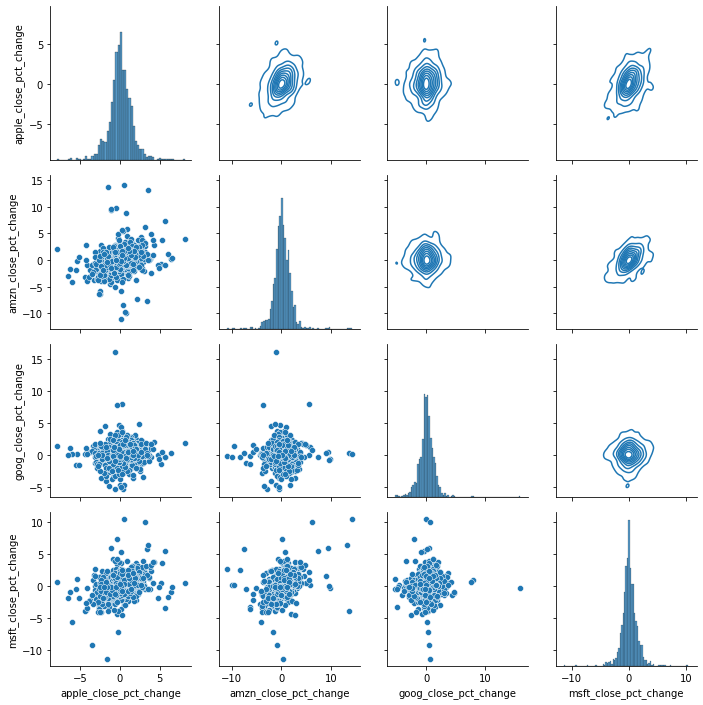

In [64]:
#plotting pairgrid for closing price pct_change
g = sns.PairGrid(data= closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [65]:
# Checking for correlation of stock closing price percentage change  
closing_p.corr()

apple_close_pct_change  amzn_close_pct_change  \
apple_close_pct_change                1.000000               0.287659   
amzn_close_pct_change                 0.287659               1.000000   
goog_close_pct_change                 0.036202               0.027698   
msft_close_pct_change                 0.366598               0.402678   

                        goog_close_pct_change  msft_close_pct_change  
apple_close_pct_change               0.036202               0.366598  
amzn_close_pct_change                0.027698               0.402678  
goog_close_pct_change                1.000000               0.038939  
msft_close_pct_change                0.038939               1.000000

''' 
Conclusion-
Percentage Change in closing price on each company are not much correlated. Only pct_change of amazon and microsoft closing prices have a correlation of 0.402678.
'''